In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

The goal of this code is to generate a polynomial with given combinatorics. Using principles from Teichmüller theory, one can prove the convergence of this algorithm to the desired polynomial.

Throughout the documentation, we use 'rational angle' to refer to an element of $\mathbb{Q}/\mathbb{Z}$ and may omit the implicit multiple of $2\pi$ where appropriate.


The underlying math comes from this paper by John Hubbard and Dierk Schleicher https://pi.math.cornell.edu/~hubbard/SpidersFinal.pdf.
This implementation is by Jeffrey Lantz and Riley Guyett.

In [79]:
class Spider:
    ## A spider is the fundamental object of our space.
    ## It has legs that go off to infinity (or |z| = exp(2). Close enough)
    ## The legs land at points in C and do not cross.
    ## Spiders may be equivalent under a certain homotopy condition, which we currently ignore
    
    
    ## A spider may be is defined by a rational angle
    ## In this case, it has legs going radially with endpoints at exp(2^j 2pi i theta)
    def __init__(self, theta=0, endpoints=np.empty(0), legs=np.empty((0,0))):
        if theta == 0:
            self.endpoints = endpoints
            self.legs = legs
        else:
            angles = np.array([theta, theta*2 % 1])
            while not any(np.abs(angles[-1]*2 % 1 - angles[:-1]) < math.pow(10,-6)):
                angles = np.append(angles, angles[-1]*2 % 1)
            self.endpoints = np.exp(2 * np.pi * 1j * angles)
            self.legs = np.kron(np.linspace(1, 5, 100), self.endpoints[:, np.newaxis])
        self.knead = [0 if (pt / np.sqrt(self.endpoints[0])).imag > 0 else 1 for pt in self.endpoints]
        
    def graph(self):
        plt.figure(figsize=(10,10))
        for leg in self.legs:
            plt.plot(leg.real, leg.imag)
        plt.plot(np.exp(np.linspace(0, 2*np.pi, 100) * 1j).real, np.exp(np.linspace(0, 2*np.pi, 100) * 1j).imag)
        limit=5 # set limits for axis
        plt.scatter(self.endpoints.real,self.endpoints.imag, s=20, marker='o')
        dividing_line = np.linspace(-5,5,100)*np.sqrt(2*np.pi*self.endpoints[0])
        plt.plot(dividing_line.real,dividing_line.imag)
        plt.xlim((-limit,limit))
        plt.ylim((-limit,limit))
        plt.ylabel('Imaginary')
        plt.show()
        
    def listpts(self):
        print("knead", self.knead)
        print("endpoints:", self.endpoints)
        print("legs:", self.legs)

In [83]:
favorite = Spider(theta=9/56)

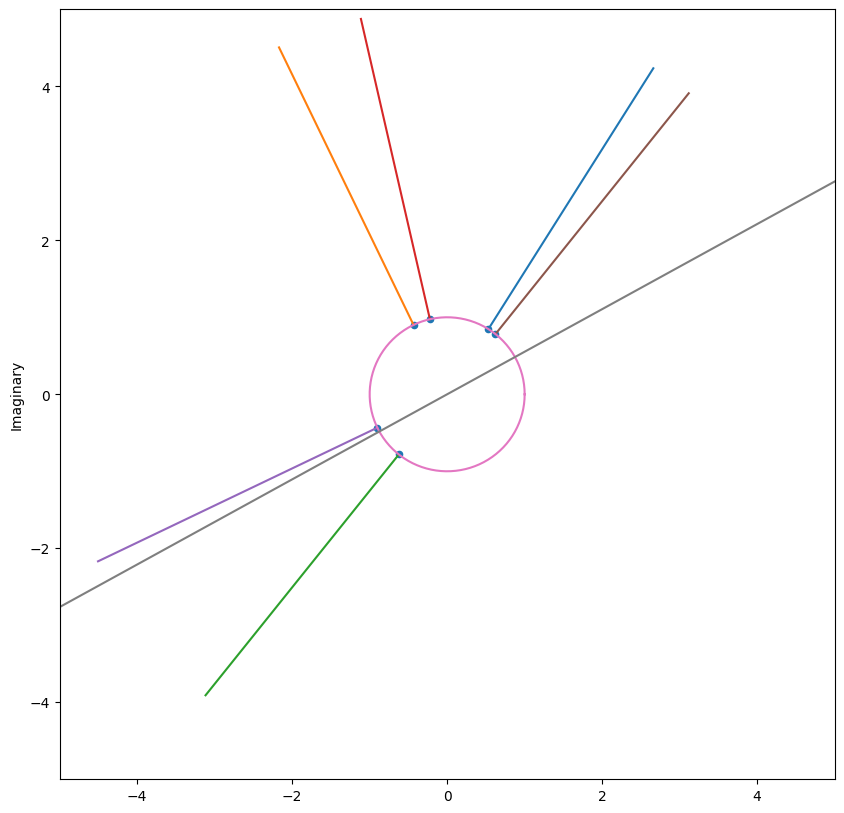

In [84]:
favorite.graph()

In [85]:
favorite.listpts()

knead [0, 0, 1, 0, 0, 0]
endpoints: [ 0.53203208+0.8467242j  -0.43388374+0.90096887j -0.6234898 -0.78183148j
 -0.22252093+0.97492791j -0.90096887-0.43388374j  0.6234898 +0.78183148j]
legs: [[ 0.53203208+0.8467242j   0.55352832+0.88093528j  0.57502457+0.91514636j
   0.59652081+0.94935744j  0.61801706+0.98356851j  0.6395133 +1.01777959j
   0.66100955+1.05199067j  0.6825058 +1.08620175j  0.70400204+1.12041283j
   0.72549829+1.15462391j  0.74699453+1.18883499j  0.76849078+1.22304607j
   0.78998702+1.25725714j  0.81148327+1.29146822j  0.83297951+1.3256793j
   0.85447576+1.35989038j  0.875972  +1.39410146j  0.89746825+1.42831254j
   0.9189645 +1.46252362j  0.94046074+1.4967347j   0.96195699+1.53094577j
   0.98345323+1.56515685j  1.00494948+1.59936793j  1.02644572+1.63357901j
   1.04794197+1.66779009j  1.06943821+1.70200117j  1.09093446+1.73621225j
   1.11243071+1.77042333j  1.13392695+1.8046344j   1.1554232 +1.83884548j
   1.17691944+1.87305656j  1.19841569+1.90726764j  1.21991193+1.94147872